In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [6]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader

### Import and visualizing dataset

In [10]:
#import the dataset 
data_set = pd.read_csv("Iris.csv")

#Let's have a look at the dataset
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Visualization

### Separating Examples and Labels and string conversion to numerics

In [11]:
Species = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}
data_set.Species = [Species[item] for item in data_set.Species]

X = data_set.iloc[:, 0:4] #predictors
y = data_set.iloc[:, 4]

In [12]:
from sklearn.preprocessing import normalize

X = normalize(X)
y = np.array(y)
y = y.astype(int)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (135, 4)
Y_train shape:  (135,)
X_test shape:  (15, 4)
Y_test shape:  (15,)


### Using Dataloader to convert numpy arrays to Tensors

In [15]:
# for loading data into pytorch model
from torch.utils.data import TensorDataset, DataLoader

trainloader = DataLoader(TensorDataset(torch.from_numpy(X_train), torch.from_numpy(Y_train)), 
                         batch_size=135, shuffle=True)

testloader = DataLoader(TensorDataset(torch.from_numpy(X_test), torch.from_numpy(Y_test)), 
                        batch_size=135, shuffle=True)

dataloaders = {
    "train": trainloader,
    "validation": testloader
}


### This class will define our model

#### Using  init we will define number of nodes in the particular layer
#### forward() defines the functionality of each layer

In [18]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 227) ### 4 predictors
        self.fc2 = nn.Linear(227, 94) ### 227 neurons in hidden layer 1, 94 in 3
        self.fc3 = nn.Linear(94, 75) ### 75 neurons in hidden layer 3
        self.fc4 = nn.Linear(75, 3) ### 3 classes
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #activation function for 1
        x = F.relu(self.fc2(x))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

### Model declaration, Type of loss and optimizer.

#### Adam optimizer is being used to optimize our network

In [19]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

### This block print a summary of model

In [20]:
model

Classifier(
  (fc1): Linear(in_features=4, out_features=227, bias=True)
  (fc2): Linear(in_features=227, out_features=94, bias=True)
  (fc3): Linear(in_features=94, out_features=75, bias=True)
  (fc4): Linear(in_features=75, out_features=3, bias=True)
  (dropout): Dropout(p=0.2)
)

### Prediction function

In [21]:
def predict(model, inputs):
    output = model(inputs)
    return output.data.numpy().argmax(axis=1)

### Procedures for forward and backward propagation

In [24]:
from torch.autograd import Variable

loss1 = []
train_acc = []

Epoch = 2000

for epoch in range(Epoch):
    acc = 0
    
    for i, (features, labels) in enumerate(trainloader):
        features = Variable(features)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        features = features.float()
        
        outputs = model(features)
        
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()
        
        if (i+1) % len(trainloader) == 0:
            Ypred = predict(model, torch.from_numpy(X_train).float())
            acc = np.mean(Y_train == Ypred)
            
            train_acc1 = acc/len(trainloader)
            train_acc.append(train_acc1)
            loss1.append(loss.data)
            
            print ('Epoch [%d/%d], Iter [%d] Loss: %.4f Training Accuracy: %.5f' %(epoch+1, 2000, i+1, loss.data, train_acc1))

Epoch [1/2000], Iter [1] Loss: 1.1368 Training Accuracy: 0.18519
Epoch [2/2000], Iter [1] Loss: 1.1357 Training Accuracy: 0.18519
Epoch [3/2000], Iter [1] Loss: 1.1318 Training Accuracy: 0.18519
Epoch [4/2000], Iter [1] Loss: 1.1323 Training Accuracy: 0.18519
Epoch [5/2000], Iter [1] Loss: 1.1310 Training Accuracy: 0.18519
Epoch [6/2000], Iter [1] Loss: 1.1288 Training Accuracy: 0.17778
Epoch [7/2000], Iter [1] Loss: 1.1287 Training Accuracy: 0.18519
Epoch [8/2000], Iter [1] Loss: 1.1248 Training Accuracy: 0.18519
Epoch [9/2000], Iter [1] Loss: 1.1237 Training Accuracy: 0.17778
Epoch [10/2000], Iter [1] Loss: 1.1259 Training Accuracy: 0.19259
Epoch [11/2000], Iter [1] Loss: 1.1214 Training Accuracy: 0.18519
Epoch [12/2000], Iter [1] Loss: 1.1203 Training Accuracy: 0.19259
Epoch [13/2000], Iter [1] Loss: 1.1207 Training Accuracy: 0.18519
Epoch [14/2000], Iter [1] Loss: 1.1193 Training Accuracy: 0.17037
Epoch [15/2000], Iter [1] Loss: 1.1196 Training Accuracy: 0.20000
Epoch [16/2000], It

Epoch [134/2000], Iter [1] Loss: 1.0035 Training Accuracy: 0.55556
Epoch [135/2000], Iter [1] Loss: 1.0070 Training Accuracy: 0.54074
Epoch [136/2000], Iter [1] Loss: 0.9883 Training Accuracy: 0.57778
Epoch [137/2000], Iter [1] Loss: 0.9900 Training Accuracy: 0.54815
Epoch [138/2000], Iter [1] Loss: 0.9966 Training Accuracy: 0.57037
Epoch [139/2000], Iter [1] Loss: 0.9896 Training Accuracy: 0.54815
Epoch [140/2000], Iter [1] Loss: 0.9924 Training Accuracy: 0.55556
Epoch [141/2000], Iter [1] Loss: 0.9889 Training Accuracy: 0.54074
Epoch [142/2000], Iter [1] Loss: 0.9904 Training Accuracy: 0.54074
Epoch [143/2000], Iter [1] Loss: 0.9816 Training Accuracy: 0.54074
Epoch [144/2000], Iter [1] Loss: 0.9955 Training Accuracy: 0.54815
Epoch [145/2000], Iter [1] Loss: 0.9961 Training Accuracy: 0.56296
Epoch [146/2000], Iter [1] Loss: 0.9821 Training Accuracy: 0.57778
Epoch [147/2000], Iter [1] Loss: 0.9920 Training Accuracy: 0.54815
Epoch [148/2000], Iter [1] Loss: 0.9844 Training Accuracy: 0.5

Epoch [259/2000], Iter [1] Loss: 0.8408 Training Accuracy: 0.65185
Epoch [260/2000], Iter [1] Loss: 0.8201 Training Accuracy: 0.65185
Epoch [261/2000], Iter [1] Loss: 0.8187 Training Accuracy: 0.65926
Epoch [262/2000], Iter [1] Loss: 0.8190 Training Accuracy: 0.66667
Epoch [263/2000], Iter [1] Loss: 0.8341 Training Accuracy: 0.65926
Epoch [264/2000], Iter [1] Loss: 0.8149 Training Accuracy: 0.65926
Epoch [265/2000], Iter [1] Loss: 0.8150 Training Accuracy: 0.67407
Epoch [266/2000], Iter [1] Loss: 0.8311 Training Accuracy: 0.67407
Epoch [267/2000], Iter [1] Loss: 0.8249 Training Accuracy: 0.68148
Epoch [268/2000], Iter [1] Loss: 0.8160 Training Accuracy: 0.66667
Epoch [269/2000], Iter [1] Loss: 0.8089 Training Accuracy: 0.67407
Epoch [270/2000], Iter [1] Loss: 0.8068 Training Accuracy: 0.69630
Epoch [271/2000], Iter [1] Loss: 0.8109 Training Accuracy: 0.67407
Epoch [272/2000], Iter [1] Loss: 0.8098 Training Accuracy: 0.66667
Epoch [273/2000], Iter [1] Loss: 0.8215 Training Accuracy: 0.6

Epoch [387/2000], Iter [1] Loss: 0.6755 Training Accuracy: 0.72593
Epoch [388/2000], Iter [1] Loss: 0.6776 Training Accuracy: 0.74815
Epoch [389/2000], Iter [1] Loss: 0.6824 Training Accuracy: 0.71111
Epoch [390/2000], Iter [1] Loss: 0.6668 Training Accuracy: 0.74815
Epoch [391/2000], Iter [1] Loss: 0.6631 Training Accuracy: 0.72593
Epoch [392/2000], Iter [1] Loss: 0.6802 Training Accuracy: 0.74074
Epoch [393/2000], Iter [1] Loss: 0.6630 Training Accuracy: 0.71111
Epoch [394/2000], Iter [1] Loss: 0.6481 Training Accuracy: 0.72593
Epoch [395/2000], Iter [1] Loss: 0.6628 Training Accuracy: 0.72593
Epoch [396/2000], Iter [1] Loss: 0.6547 Training Accuracy: 0.72593
Epoch [397/2000], Iter [1] Loss: 0.6771 Training Accuracy: 0.74074
Epoch [398/2000], Iter [1] Loss: 0.6572 Training Accuracy: 0.73333
Epoch [399/2000], Iter [1] Loss: 0.6389 Training Accuracy: 0.74074
Epoch [400/2000], Iter [1] Loss: 0.6619 Training Accuracy: 0.73333
Epoch [401/2000], Iter [1] Loss: 0.6618 Training Accuracy: 0.7

Epoch [516/2000], Iter [1] Loss: 0.5772 Training Accuracy: 0.75556
Epoch [517/2000], Iter [1] Loss: 0.5639 Training Accuracy: 0.76296
Epoch [518/2000], Iter [1] Loss: 0.5708 Training Accuracy: 0.74815
Epoch [519/2000], Iter [1] Loss: 0.5697 Training Accuracy: 0.76296
Epoch [520/2000], Iter [1] Loss: 0.5637 Training Accuracy: 0.75556
Epoch [521/2000], Iter [1] Loss: 0.5652 Training Accuracy: 0.77037
Epoch [522/2000], Iter [1] Loss: 0.5596 Training Accuracy: 0.75556
Epoch [523/2000], Iter [1] Loss: 0.5509 Training Accuracy: 0.75556
Epoch [524/2000], Iter [1] Loss: 0.5774 Training Accuracy: 0.74074
Epoch [525/2000], Iter [1] Loss: 0.5631 Training Accuracy: 0.74074
Epoch [526/2000], Iter [1] Loss: 0.5631 Training Accuracy: 0.77037
Epoch [527/2000], Iter [1] Loss: 0.5627 Training Accuracy: 0.75556
Epoch [528/2000], Iter [1] Loss: 0.5565 Training Accuracy: 0.74074
Epoch [529/2000], Iter [1] Loss: 0.5558 Training Accuracy: 0.77037
Epoch [530/2000], Iter [1] Loss: 0.5782 Training Accuracy: 0.7

Epoch [645/2000], Iter [1] Loss: 0.5128 Training Accuracy: 0.78519
Epoch [646/2000], Iter [1] Loss: 0.5079 Training Accuracy: 0.79259
Epoch [647/2000], Iter [1] Loss: 0.5147 Training Accuracy: 0.77778
Epoch [648/2000], Iter [1] Loss: 0.4992 Training Accuracy: 0.78519
Epoch [649/2000], Iter [1] Loss: 0.5106 Training Accuracy: 0.78519
Epoch [650/2000], Iter [1] Loss: 0.4959 Training Accuracy: 0.76296
Epoch [651/2000], Iter [1] Loss: 0.5011 Training Accuracy: 0.79259
Epoch [652/2000], Iter [1] Loss: 0.4989 Training Accuracy: 0.78519
Epoch [653/2000], Iter [1] Loss: 0.5043 Training Accuracy: 0.75556
Epoch [654/2000], Iter [1] Loss: 0.5019 Training Accuracy: 0.79259
Epoch [655/2000], Iter [1] Loss: 0.5025 Training Accuracy: 0.77778
Epoch [656/2000], Iter [1] Loss: 0.5052 Training Accuracy: 0.79259
Epoch [657/2000], Iter [1] Loss: 0.5169 Training Accuracy: 0.76296
Epoch [658/2000], Iter [1] Loss: 0.4981 Training Accuracy: 0.78519
Epoch [659/2000], Iter [1] Loss: 0.5043 Training Accuracy: 0.7

Epoch [774/2000], Iter [1] Loss: 0.4748 Training Accuracy: 0.79259
Epoch [775/2000], Iter [1] Loss: 0.4542 Training Accuracy: 0.77778
Epoch [776/2000], Iter [1] Loss: 0.4587 Training Accuracy: 0.77778
Epoch [777/2000], Iter [1] Loss: 0.4518 Training Accuracy: 0.77037
Epoch [778/2000], Iter [1] Loss: 0.4691 Training Accuracy: 0.77778
Epoch [779/2000], Iter [1] Loss: 0.4815 Training Accuracy: 0.78519
Epoch [780/2000], Iter [1] Loss: 0.4723 Training Accuracy: 0.78519
Epoch [781/2000], Iter [1] Loss: 0.4478 Training Accuracy: 0.80000
Epoch [782/2000], Iter [1] Loss: 0.4551 Training Accuracy: 0.78519
Epoch [783/2000], Iter [1] Loss: 0.4607 Training Accuracy: 0.77037
Epoch [784/2000], Iter [1] Loss: 0.4543 Training Accuracy: 0.78519
Epoch [785/2000], Iter [1] Loss: 0.4511 Training Accuracy: 0.79259
Epoch [786/2000], Iter [1] Loss: 0.4541 Training Accuracy: 0.79259
Epoch [787/2000], Iter [1] Loss: 0.4555 Training Accuracy: 0.78519
Epoch [788/2000], Iter [1] Loss: 0.4595 Training Accuracy: 0.7

Epoch [905/2000], Iter [1] Loss: 0.4534 Training Accuracy: 0.80000
Epoch [906/2000], Iter [1] Loss: 0.4305 Training Accuracy: 0.79259
Epoch [907/2000], Iter [1] Loss: 0.4347 Training Accuracy: 0.78519
Epoch [908/2000], Iter [1] Loss: 0.4210 Training Accuracy: 0.80000
Epoch [909/2000], Iter [1] Loss: 0.4222 Training Accuracy: 0.79259
Epoch [910/2000], Iter [1] Loss: 0.4333 Training Accuracy: 0.80000
Epoch [911/2000], Iter [1] Loss: 0.4417 Training Accuracy: 0.80741
Epoch [912/2000], Iter [1] Loss: 0.4245 Training Accuracy: 0.80741
Epoch [913/2000], Iter [1] Loss: 0.4293 Training Accuracy: 0.79259
Epoch [914/2000], Iter [1] Loss: 0.4149 Training Accuracy: 0.80000
Epoch [915/2000], Iter [1] Loss: 0.4223 Training Accuracy: 0.77778
Epoch [916/2000], Iter [1] Loss: 0.4155 Training Accuracy: 0.80741
Epoch [917/2000], Iter [1] Loss: 0.4089 Training Accuracy: 0.79259
Epoch [918/2000], Iter [1] Loss: 0.4300 Training Accuracy: 0.78519
Epoch [919/2000], Iter [1] Loss: 0.4166 Training Accuracy: 0.7

Epoch [1030/2000], Iter [1] Loss: 0.4093 Training Accuracy: 0.80000
Epoch [1031/2000], Iter [1] Loss: 0.4038 Training Accuracy: 0.80000
Epoch [1032/2000], Iter [1] Loss: 0.4078 Training Accuracy: 0.79259
Epoch [1033/2000], Iter [1] Loss: 0.4140 Training Accuracy: 0.80741
Epoch [1034/2000], Iter [1] Loss: 0.4017 Training Accuracy: 0.81481
Epoch [1035/2000], Iter [1] Loss: 0.4059 Training Accuracy: 0.79259
Epoch [1036/2000], Iter [1] Loss: 0.3996 Training Accuracy: 0.78519
Epoch [1037/2000], Iter [1] Loss: 0.3869 Training Accuracy: 0.80000
Epoch [1038/2000], Iter [1] Loss: 0.3982 Training Accuracy: 0.80000
Epoch [1039/2000], Iter [1] Loss: 0.3969 Training Accuracy: 0.80000
Epoch [1040/2000], Iter [1] Loss: 0.4047 Training Accuracy: 0.80000
Epoch [1041/2000], Iter [1] Loss: 0.4041 Training Accuracy: 0.80741
Epoch [1042/2000], Iter [1] Loss: 0.4024 Training Accuracy: 0.79259
Epoch [1043/2000], Iter [1] Loss: 0.4049 Training Accuracy: 0.80000
Epoch [1044/2000], Iter [1] Loss: 0.3896 Trainin

Epoch [1155/2000], Iter [1] Loss: 0.3919 Training Accuracy: 0.80000
Epoch [1156/2000], Iter [1] Loss: 0.3841 Training Accuracy: 0.82222
Epoch [1157/2000], Iter [1] Loss: 0.3825 Training Accuracy: 0.80741
Epoch [1158/2000], Iter [1] Loss: 0.3809 Training Accuracy: 0.80000
Epoch [1159/2000], Iter [1] Loss: 0.3816 Training Accuracy: 0.80000
Epoch [1160/2000], Iter [1] Loss: 0.4037 Training Accuracy: 0.80741
Epoch [1161/2000], Iter [1] Loss: 0.3896 Training Accuracy: 0.80000
Epoch [1162/2000], Iter [1] Loss: 0.3723 Training Accuracy: 0.80741
Epoch [1163/2000], Iter [1] Loss: 0.3834 Training Accuracy: 0.79259
Epoch [1164/2000], Iter [1] Loss: 0.3824 Training Accuracy: 0.81481
Epoch [1165/2000], Iter [1] Loss: 0.3747 Training Accuracy: 0.79259
Epoch [1166/2000], Iter [1] Loss: 0.3841 Training Accuracy: 0.81481
Epoch [1167/2000], Iter [1] Loss: 0.3806 Training Accuracy: 0.81481
Epoch [1168/2000], Iter [1] Loss: 0.3755 Training Accuracy: 0.80741
Epoch [1169/2000], Iter [1] Loss: 0.3902 Trainin

Epoch [1275/2000], Iter [1] Loss: 0.3658 Training Accuracy: 0.79259
Epoch [1276/2000], Iter [1] Loss: 0.3627 Training Accuracy: 0.80000
Epoch [1277/2000], Iter [1] Loss: 0.3669 Training Accuracy: 0.82222
Epoch [1278/2000], Iter [1] Loss: 0.3732 Training Accuracy: 0.80741
Epoch [1279/2000], Iter [1] Loss: 0.3569 Training Accuracy: 0.81481
Epoch [1280/2000], Iter [1] Loss: 0.3645 Training Accuracy: 0.79259
Epoch [1281/2000], Iter [1] Loss: 0.3602 Training Accuracy: 0.80000
Epoch [1282/2000], Iter [1] Loss: 0.3633 Training Accuracy: 0.80000
Epoch [1283/2000], Iter [1] Loss: 0.3576 Training Accuracy: 0.79259
Epoch [1284/2000], Iter [1] Loss: 0.3666 Training Accuracy: 0.77778
Epoch [1285/2000], Iter [1] Loss: 0.3714 Training Accuracy: 0.78519
Epoch [1286/2000], Iter [1] Loss: 0.3665 Training Accuracy: 0.82222
Epoch [1287/2000], Iter [1] Loss: 0.3716 Training Accuracy: 0.81481
Epoch [1288/2000], Iter [1] Loss: 0.3452 Training Accuracy: 0.80741
Epoch [1289/2000], Iter [1] Loss: 0.3543 Trainin

Epoch [1400/2000], Iter [1] Loss: 0.3515 Training Accuracy: 0.81481
Epoch [1401/2000], Iter [1] Loss: 0.3646 Training Accuracy: 0.81481
Epoch [1402/2000], Iter [1] Loss: 0.3668 Training Accuracy: 0.81481
Epoch [1403/2000], Iter [1] Loss: 0.3390 Training Accuracy: 0.82963
Epoch [1404/2000], Iter [1] Loss: 0.3393 Training Accuracy: 0.80000
Epoch [1405/2000], Iter [1] Loss: 0.3445 Training Accuracy: 0.79259
Epoch [1406/2000], Iter [1] Loss: 0.3618 Training Accuracy: 0.79259
Epoch [1407/2000], Iter [1] Loss: 0.3613 Training Accuracy: 0.80000
Epoch [1408/2000], Iter [1] Loss: 0.3471 Training Accuracy: 0.83704
Epoch [1409/2000], Iter [1] Loss: 0.3585 Training Accuracy: 0.79259
Epoch [1410/2000], Iter [1] Loss: 0.3508 Training Accuracy: 0.82222
Epoch [1411/2000], Iter [1] Loss: 0.3504 Training Accuracy: 0.79259
Epoch [1412/2000], Iter [1] Loss: 0.3432 Training Accuracy: 0.82963
Epoch [1413/2000], Iter [1] Loss: 0.3466 Training Accuracy: 0.80741
Epoch [1414/2000], Iter [1] Loss: 0.3477 Trainin

Epoch [1520/2000], Iter [1] Loss: 0.3451 Training Accuracy: 0.81481
Epoch [1521/2000], Iter [1] Loss: 0.3397 Training Accuracy: 0.80000
Epoch [1522/2000], Iter [1] Loss: 0.3274 Training Accuracy: 0.80000
Epoch [1523/2000], Iter [1] Loss: 0.3373 Training Accuracy: 0.79259
Epoch [1524/2000], Iter [1] Loss: 0.3361 Training Accuracy: 0.82222
Epoch [1525/2000], Iter [1] Loss: 0.3357 Training Accuracy: 0.79259
Epoch [1526/2000], Iter [1] Loss: 0.3370 Training Accuracy: 0.81481
Epoch [1527/2000], Iter [1] Loss: 0.3315 Training Accuracy: 0.82222
Epoch [1528/2000], Iter [1] Loss: 0.3349 Training Accuracy: 0.81481
Epoch [1529/2000], Iter [1] Loss: 0.3390 Training Accuracy: 0.80000
Epoch [1530/2000], Iter [1] Loss: 0.3426 Training Accuracy: 0.80741
Epoch [1531/2000], Iter [1] Loss: 0.3364 Training Accuracy: 0.82963
Epoch [1532/2000], Iter [1] Loss: 0.3198 Training Accuracy: 0.82222
Epoch [1533/2000], Iter [1] Loss: 0.3356 Training Accuracy: 0.83704
Epoch [1534/2000], Iter [1] Loss: 0.3321 Trainin

Epoch [1644/2000], Iter [1] Loss: 0.3158 Training Accuracy: 0.81481
Epoch [1645/2000], Iter [1] Loss: 0.3273 Training Accuracy: 0.81481
Epoch [1646/2000], Iter [1] Loss: 0.3429 Training Accuracy: 0.80000
Epoch [1647/2000], Iter [1] Loss: 0.3205 Training Accuracy: 0.82222
Epoch [1648/2000], Iter [1] Loss: 0.3300 Training Accuracy: 0.84444
Epoch [1649/2000], Iter [1] Loss: 0.3240 Training Accuracy: 0.81481
Epoch [1650/2000], Iter [1] Loss: 0.3255 Training Accuracy: 0.79259
Epoch [1651/2000], Iter [1] Loss: 0.3335 Training Accuracy: 0.81481
Epoch [1652/2000], Iter [1] Loss: 0.3446 Training Accuracy: 0.81481
Epoch [1653/2000], Iter [1] Loss: 0.3481 Training Accuracy: 0.82963
Epoch [1654/2000], Iter [1] Loss: 0.3317 Training Accuracy: 0.85185
Epoch [1655/2000], Iter [1] Loss: 0.3454 Training Accuracy: 0.81481
Epoch [1656/2000], Iter [1] Loss: 0.3240 Training Accuracy: 0.79259
Epoch [1657/2000], Iter [1] Loss: 0.3360 Training Accuracy: 0.83704
Epoch [1658/2000], Iter [1] Loss: 0.3243 Trainin

Epoch [1766/2000], Iter [1] Loss: 0.3338 Training Accuracy: 0.81481
Epoch [1767/2000], Iter [1] Loss: 0.3137 Training Accuracy: 0.80000
Epoch [1768/2000], Iter [1] Loss: 0.3207 Training Accuracy: 0.81481
Epoch [1769/2000], Iter [1] Loss: 0.3282 Training Accuracy: 0.80000
Epoch [1770/2000], Iter [1] Loss: 0.3354 Training Accuracy: 0.78519
Epoch [1771/2000], Iter [1] Loss: 0.3115 Training Accuracy: 0.77778
Epoch [1772/2000], Iter [1] Loss: 0.3215 Training Accuracy: 0.82963
Epoch [1773/2000], Iter [1] Loss: 0.3263 Training Accuracy: 0.85185
Epoch [1774/2000], Iter [1] Loss: 0.3211 Training Accuracy: 0.80741
Epoch [1775/2000], Iter [1] Loss: 0.3224 Training Accuracy: 0.78519
Epoch [1776/2000], Iter [1] Loss: 0.3213 Training Accuracy: 0.82222
Epoch [1777/2000], Iter [1] Loss: 0.3317 Training Accuracy: 0.80741
Epoch [1778/2000], Iter [1] Loss: 0.3040 Training Accuracy: 0.79259
Epoch [1779/2000], Iter [1] Loss: 0.3143 Training Accuracy: 0.84444
Epoch [1780/2000], Iter [1] Loss: 0.3197 Trainin

Epoch [1888/2000], Iter [1] Loss: 0.3259 Training Accuracy: 0.80741
Epoch [1889/2000], Iter [1] Loss: 0.3075 Training Accuracy: 0.83704
Epoch [1890/2000], Iter [1] Loss: 0.3048 Training Accuracy: 0.83704
Epoch [1891/2000], Iter [1] Loss: 0.3157 Training Accuracy: 0.79259
Epoch [1892/2000], Iter [1] Loss: 0.3083 Training Accuracy: 0.80741
Epoch [1893/2000], Iter [1] Loss: 0.3228 Training Accuracy: 0.81481
Epoch [1894/2000], Iter [1] Loss: 0.3051 Training Accuracy: 0.82963
Epoch [1895/2000], Iter [1] Loss: 0.3204 Training Accuracy: 0.80741
Epoch [1896/2000], Iter [1] Loss: 0.3124 Training Accuracy: 0.78519
Epoch [1897/2000], Iter [1] Loss: 0.3086 Training Accuracy: 0.82963
Epoch [1898/2000], Iter [1] Loss: 0.3235 Training Accuracy: 0.84444
Epoch [1899/2000], Iter [1] Loss: 0.3201 Training Accuracy: 0.82222
Epoch [1900/2000], Iter [1] Loss: 0.2965 Training Accuracy: 0.82222
Epoch [1901/2000], Iter [1] Loss: 0.3203 Training Accuracy: 0.83704
Epoch [1902/2000], Iter [1] Loss: 0.3195 Trainin

### Plot the accuracies and loss functions below

In [25]:
np_loss = loss1[0].numpy()

for i in range(len(loss1)):
    np_loss = np.append(np_loss, loss1[i])

np_acc = train_acc[0]

for i in range(len(train_acc)):
    np_acc = np.append(np_acc, train_acc[i])

### Training Accuracy

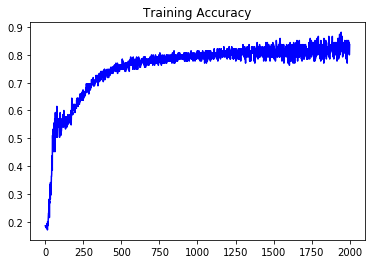

In [26]:
%matplotlib inline
plt.plot(np_acc, color="blue")
plt.title("Training Accuracy")
plt.show()

No handles with labels found to put in legend.


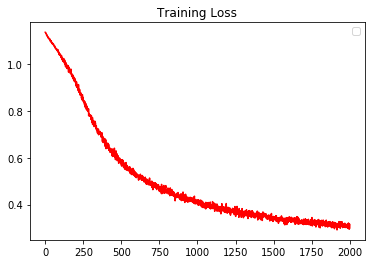

In [27]:
%matplotlib inline
plt.plot(np_loss, color="red")
plt.title("Training Loss")
plt.legend()
plt.show()

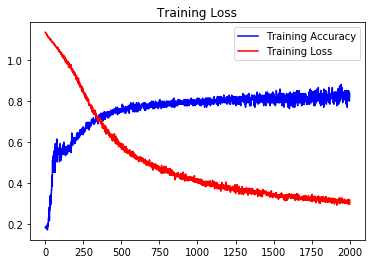

In [29]:
%matplotlib inline
plt.plot(np_acc, color="blue", label="Training Accuracy")
plt.plot(np_loss, color="red", label="Training Loss")
plt.title("Training Loss")
plt.legend()
plt.show()

### Test Accuracy

In [32]:
Ypred = predict(model, torch.from_numpy(X_test).float())
acc = np.mean(Y_test == Ypred)
print('Test accuracy: ', acc)

Test accuracy:  0.7333333333333333


### Precision, Recall, F1 Score

In [33]:
from sklearn.metrics import classification_report
target_names = ['data_set-setosa', 'data_set-versicolor', 'data_set-virginica']
print(classification_report(Y_test, Ypred, target_names=target_names))

                     precision    recall  f1-score   support

    data_set-setosa       1.00      1.00      1.00         5
data_set-versicolor       0.60      1.00      0.75         6
 data_set-virginica       0.00      0.00      0.00         4

           accuracy                           0.73        15
          macro avg       0.53      0.67      0.58        15
       weighted avg       0.57      0.73      0.63        15



C:\Users\aland\.conda\envs\study\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
